# Music_Box - Model for Churn Prediction and Insights

## Main tasks

1. Load data, Define Features and Target    
    - 1.1 Load data    
    - 1.2 Define Features and Target    
2. Split train-test data, and define model realted functions    
    - 2.1 Train-test split the data  
    - 2.2 Define model related functions  
3. Models comparison and reasoning  
    - 3.1 Logistic Regression  
    - 3.2 Random Forest  
    - 3.3 Gradient Boosting Trees  
4. HyperParameter Tuning with Grid Search   
    - 4.1 Random Forest HyperParameter Tuning with Grid Search  
5. Explore features importance to get insights  
    - 5.1 Top 10 features analysis  
    - 5.2 Business model and stage analysis  
    - 5.3 Insights  
    - 5.4 Next setp  

## 1. Load data, Define Features and Target
- 1.1 Load data    
- 1.2 Define Features and Target

### 1.1 Load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

% matplotlib inline
# Always make it pretty.
plt.style.use('ggplot')

In [2]:
# Load data from file
df = pd.read_csv('../data/df_model_final.csv')

In [3]:
# Browse dataset
df.head(5)

,uid,label,time_percentage_0_to_20,time_percentage_20_to_40,time_percentage_40_to_60,time_percentage_60_to_80,time_percentage_larger_than_80,time_percentage_larger_than_80_7d_over_30d,total_play_time,total_play_time_7d_over_30d,...,freq_S_last_3,freq_S_last_7,freq_S_last_14,freq_S_last_30,P_7d_over_P_30d,D_7d_over_D_30d,S_7d_over_S_30d,last_P_time_from_2017-04-28,last_D_time_from_2017-04-28,last_S_time_from_2017-04-28
0,104777734,1,1.00,0.00,0.00,0.00,0.00,0.00,37,0.00,...,0,0,0,0,0.00,0.0,0.00,28,0,0
1,11596711,0,0.47,0.11,0.02,0.06,0.34,0.45,11476,0.47,...,2,3,11,21,0.36,0.0,0.14,0,0,1
2,118301183,1,0.70,0.10,0.00,0.00,0.20,0.00,611,0.00,...,0,0,0,0,0.00,0.0,0.00,27,0,0
3,151294213,1,0.81,0.00,0.00,0.13,0.06,0.00,737,0.00,...,0,0,0,0,0.00,0.0,0.00,11,0,0
4,166601616,0,0.29,0.12,0.08,0.09,0.42,0.45,7238,0.57,...,6,22,22,31,0.47,0.0,0.71,0,14,0


In [4]:
# Show summary stats
df.describe()

,uid,label,time_percentage_0_to_20,time_percentage_20_to_40,time_percentage_40_to_60,time_percentage_60_to_80,time_percentage_larger_than_80,time_percentage_larger_than_80_7d_over_30d,total_play_time,total_play_time_7d_over_30d,...,freq_S_last_3,freq_S_last_7,freq_S_last_14,freq_S_last_30,P_7d_over_P_30d,D_7d_over_D_30d,S_7d_over_S_30d,last_P_time_from_2017-04-28,last_D_time_from_2017-04-28,last_S_time_from_2017-04-28
count,5.843200e+04,58432.000000,58432.000000,58432.000000,58432.000000,58432.000000,58432.000000,58432.000000,5.843200e+04,58432.000000,...,58432.000000,58432.000000,58432.000000,58432.000000,58432.000000,58432.000000,58432.000000,58432.000000,58432.000000,58432.000000
mean,1.673851e+08,0.620756,0.357923,0.058494,0.063032,0.085445,0.422201,0.095849,2.022589e+04,0.100825,...,0.349569,1.183975,2.872245,10.605045,0.100321,0.036120,0.055116,14.998939,6.881931,9.195081
std,1.038554e+07,0.485203,0.290443,0.099466,0.132124,0.173721,0.316197,0.210122,5.337275e+04,0.210832,...,2.155209,5.645728,10.787450,28.680910,0.209837,0.156055,0.173888,11.535102,10.725027,11.385494
min,9.328690e+05,0.000000,0.000000,0.000000,0.000000,0.000000,-0.020000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.680335e+08,0.000000,0.110000,0.000000,0.000000,0.000000,0.130000,0.000000,5.440000e+02,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.684907e+08,1.000000,0.320000,0.020000,0.030000,0.040000,0.410000,0.000000,3.623000e+03,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,15.000000,0.000000,2.000000
75%,1.687740e+08,1.000000,0.540000,0.080000,0.070000,0.080000,0.670000,0.080000,1.711300e+04,0.100000,...,0.000000,0.000000,1.000000,10.000000,0.100000,0.000000,0.000000,28.000000,13.000000,20.000000
max,1.692612e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.438919e+06,1.000000,...,114.000000,398.000000,451.000000,1462.000000,1.000000,1.000000,1.000000,29.000000,29.000000,29.000000


In [5]:
# one-hot encoding
df['device_type_0'] = (df['device'] == 0).astype(int)
df['device_type_1'] = (df['device'] == 1).astype(int)

### 1.2 Define Features and Target

In [6]:
selected_features = list(df.columns.values)

In [7]:
selected_features.remove('uid')
selected_features.remove('label')
selected_features.remove('device')
selected_features

['time_percentage_0_to_20',
 'time_percentage_20_to_40',
 'time_percentage_40_to_60',
 'time_percentage_60_to_80',
 'time_percentage_larger_than_80',
 'time_percentage_larger_than_80_7d_over_30d',
 'total_play_time',
 'total_play_time_7d_over_30d',
 'average_play_time',
 'freq_P_last_1',
 'freq_P_last_3',
 'freq_P_last_7',
 'freq_P_last_14',
 'freq_P_last_30',
 'freq_D_last_1',
 'freq_D_last_3',
 'freq_D_last_7',
 'freq_D_last_14',
 'freq_D_last_30',
 'freq_S_last_1',
 'freq_S_last_3',
 'freq_S_last_7',
 'freq_S_last_14',
 'freq_S_last_30',
 'P_7d_over_P_30d',
 'D_7d_over_D_30d',
 'S_7d_over_S_30d',
 'last_P_time_from_2017-04-28',
 'last_D_time_from_2017-04-28',
 'last_S_time_from_2017-04-28',
 'device_type_0',
 'device_type_1']

In [8]:
X = df[selected_features]
y = df['label']

In [9]:
X.shape

(58432, 32)

In [10]:
y[:5]

0    1
1    0
2    1
3    1
4    0
Name: label, dtype: int64

## 2. Split train-test data, and define model realted functions
- 2.1 Train-test split the data  
- 2.2 Define model related functions  

### 2.1 Train-test split the data

In [11]:
# import train test split function from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 2.2 Define model related functions

#### Train model using sklearn

In [12]:
# define function to perform train, test, and get model performance
def train_test_model(clf, X_train, y_train, X_test, y_test, model):
    # Fit a model by providing X and y from training set
    clf.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    # print model results
    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred, model)


#### Calculate the metric scores for the model

In [13]:
# define function to plot the modle performance
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred, model):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves of '+ model)
    plt.legend(loc="lower right")
    plt.show()

In [14]:
# Import metrics functions from sklearn
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [15]:
import pandas as pd
# Helper method to print metric scores    
def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, y_train_pred),
                    accuracy_score(y_train, y_train_pred>threshold),
                    precision_score(y_train, y_train_pred>threshold),
                    recall_score(y_train, y_train_pred>threshold),
                    f1_score(y_train, y_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, y_test_pred),
                    accuracy_score(y_test, y_test_pred>threshold),
                    precision_score(y_test, y_test_pred>threshold),
                    recall_score(y_test, y_test_pred>threshold),
                    f1_score(y_test, y_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

## 3. Models comparison and reasoning 
- 3.1 Logistic Regression  
- 3.2 Random Forest  
- 3.3 Gradient Boosting Trees  

### 3.1 Logistic Regression

              train      test
metrics                      
AUC        0.884195  0.886565
Accuracy   0.812001  0.814666
Precision  0.828210  0.827604
Recall     0.880340  0.883023
f1-score   0.853480  0.854416


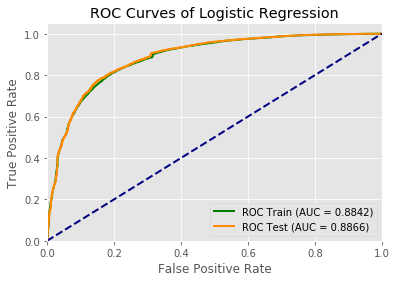

In [16]:
# Import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

# Initialize model by providing parameters
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
clf = LogisticRegression(C=1.0, penalty='l2')
# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test, 'Logistic Regression')

#### AUC of test data is 0.8866 with Logistic Regression, we will try to improve model performance with Random Forest. 

### 3.2 Random Forest

              train      test
metrics                      
AUC        0.927675  0.906158
Accuracy   0.852348  0.832891
Precision  0.862525  0.845839
Recall     0.907202  0.891081
f1-score   0.884299  0.867871


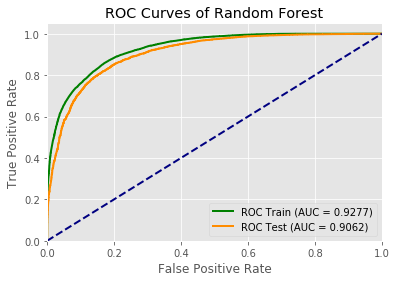

In [20]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

# Choose some parameter combinations to try
parameters = {'n_estimators': 50,
              'max_features': 'auto',
              'criterion': 'gini',
              'max_depth': 20,
              'min_samples_split': 2,
              'min_samples_leaf': 20,
              'random_state': 0,
              'n_jobs': -1
              }

clf_rf = RandomForestClassifier(**parameters)

# Fit a model by providing X and y from training set
clf_rf.fit(X_train, y_train)

# Train test model
train_test_model(clf_rf, X_train, y_train, X_test, y_test, 'Random Forest')

#### AUC of test data is 0.9061 with Random Forest, better than that of Logistic Regression with 0.8866,  because there are feature interaction and non-linearity relationship between features and target in our data set, trees algorithms can deal with these problems while logistic regression cannot.

#### We will try to further improve model performance with Gradient Boosting Trees, because in general, Gradient Boosting Trees can perform better than Random Forest, because it additionally tries to find optimal linear combination of trees (assume final model is the weighted sum of predictions of individual trees) in relation to given train data. This extra tuning may lead to more predictive power.

### 3.3 Gradient Boosting Trees

              train      test
metrics                      
AUC        0.914053  0.903622
Accuracy   0.846572  0.830838
Precision  0.858485  0.843442
Recall     0.902009  0.890664
f1-score   0.879709  0.866410


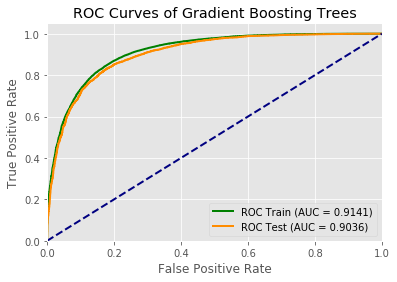

In [175]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
from sklearn.ensemble import GradientBoostingClassifier

# Choose some parameter combinations to try
# parameters = {
#     'n_estimators': 100,
#     'max_depth': 5,
#     'learning_rate': 0.1,
#     'random_state': 42
# }

parameters = {
    'n_estimators': 200,
    'max_depth': 3,
    'learning_rate': 0.2,
    'subsample': 0.8,
    'max_features':0.7,
    'random_state': 42
}

clf = GradientBoostingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test, 'Gradient Boosting Trees')

#### AUC of test data is 0.9036 with Gradient Boosting Trees, is close to that of Random Forest with 0.9061, means our Random forest has already performed greatly in this dataset and hard for Gradient Boosting Trees to perform better. 
### Thus, we choose Random Forest here. 
#### Next, we will try HyperParameter Tuning with Grid Search for Random Forest, to figure out whether we can do better.

##  4. HyperParameter Tuning with Grid Search
- 4.1 Random Forest HyperParameter Tuning with Grid Search

### 4.1 Random Forest HyperParameter Tuning with Grid Search

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
param_grid = {'n_estimators': [100,200], 
              'max_features': ['auto'], 
              'criterion': ['gini'],
              'max_depth': [15,20,25], 
              'min_samples_split': [2],
              'min_samples_leaf': [2,10,20],
              'n_jobs':[-1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

              train      test
metrics                      
AUC        0.964287  0.906041
Accuracy   0.906771  0.829469
Precision  0.901991  0.843383
Recall     0.953739  0.888024
f1-score   0.927143  0.865128


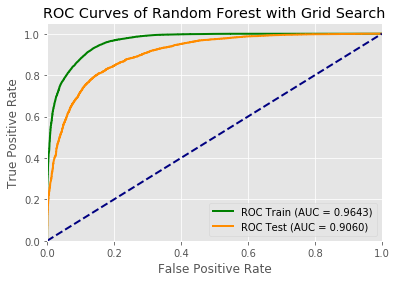

In [27]:
# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test, 'Random Forest with Grid Search')

#### The AUC of the  Random Forest with Grid Search is close to that of our previous Random Forest,  means we have already get a good model.
#### We select this model to explore the features importance to get some insights

## 5. Explore features importance to get insights
- 5.1 Top 10 features analysis  
- 5.2 Business model and stage analysis  
- 5.3 Insights  
- 5.4 Next setp 

### 5.1 Top 10 features analysis

#### The plot below shows the ranked feature importance generated by Random Forest:

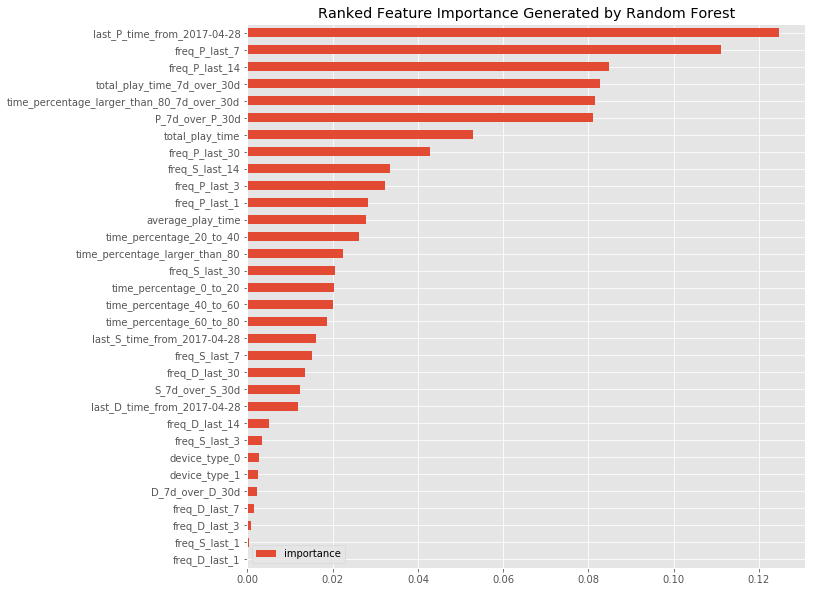

In [178]:
df_feature_importance = pd.DataFrame()
df_feature_importance['feature'] = selected_features
df_feature_importance['importance'] = clf.feature_importances_
df_feature_importance.sort_values('importance',inplace=True)

ax = df_feature_importance.plot.barh(figsize = (10, 10))
t = np.arange(len(df_feature_importance['feature']))
ax.set_yticks(t)
ax.set_yticklabels(df_feature_importance['feature'])
ax.set_title('Ranked Feature Importance Generated by Random Forest')
plt.show()

#### As we can see, the top 10 features are:

1. 'last_P_time_from_2017-04-28': the larger the time gap between 'the last active day' and 'feature_window_end_date' is, the more likely the user will churn.   

2. 'freq_P_last_7': the smaller play frequency in the last 7 days, the more likely the user will churn. And its feature importance is larger than those of 'freq_P_last_14', 'freq_P_last_30', which shows user recent behavior pattern is more informative.  

3. 'freq_P_last_14': the same idea with 'freq_P_last_7'  

4. 'total_play_time_7d_over_30d': if the total play time acceleration ratio is less than 25%, means user had played less time in the last 7 days than average level of the last 30 days, the smaller the ratio is, the more likely the user will churn.   

5. 'time_percentage_larger_than_80_7d_over_30d': if the time_percentage acceleration ratio is less than 25%, means user had played less songs with high percentage in the last 7 days than average level of the last 30 days, the smaller the ratio is, the more likely the user will churn.   

6. 'P_7d_over_30d': if the play frequency acceleration ratio is less than 25%, means user had played less frequently in the last 7 days than average level of the last 30 days, the smaller the ratio is, the more likely the user will churn.   

7. 'total_play_time': the smaller total play time is, the more likely the user will churn.   

8. 'freq_P_last_30': the same idea with 'freq_P_last_7'.  

9. 'freq_S_last_14': the smaller search frequency in the last 14 days, the more likely the user will churn. Its feature importance is large perhaps because 14 days fits our label window which last 14 days better.  

10. 'freq_P_last_3': the same idea with 'freq_P_last_7', while its time window is too short to be as informative as 'freq_P_last_7'  

### 5.2 Business model and stage analysis

####  As we are not told what business the music box is running, we will analyze different scenarios to figure out what we can do to reactive users with high churn probability.

1/ If it's running a freemium model:   
For free users with high churn probability, we can offer them one month paid version free trial to reactive them;   
For paid users with high churn probability, we can offer them discount or even a freemonth;   


2/ If it's running a paid model:   
For paid users with high churn probability, we can offer them discount or even a freemonth;   

#### Of course, we need to consider two factors before offering free trial, discount or freemonth : 

1/ We should weigh the cost of doing so against the cost of acquiring another customer.   
2/ We should make sure whether our music box is in the 'Stickiness' stage to improve user engagement, or in the 'Revenue' stage to improve profit.  


If music box is in the 'Stickiness' stage, it's reasonable to offer trial, discount and freemonth even when the cost of doing so overweighs the cost of acquiring another customer to improve user engagement.  


If music box is in 'Revenue' stage and the cost of offering trial, discount or freemonth overweighs the cost of acquiring another customer, it's better to just sending e-mail and allocate more budgets to campaigns to attract new users and improve profits.  

#### We can calculate the churn rate to make a guess what stage our music box is in: 

In [167]:
# churn_rate = count of 1 / (count of 0 + count of 1)
churn_count = df['label'].value_counts()
churn_rate = round(churn_count[1] / (churn_count[0] + churn_count[1]), 2)
print('Churn rate is: ' + str(churn_rate))

Churn rate is: 0.62


#### As the music box has a very high churn rate of 0.62, we conclude it's in the 'Stickiness' stage, thus offering free trial, discount or freemonth is reasonable, and sending e-mail which is applicable to every business model is also good choice.

### 5.3 Insights 

#### By analyzing the top 10 features and business model above, we have some insights:

1. Users' recent behavior pattern is more informative, we should pay more attention to last 7 days and last 14 days related matric, especially frequency features and acceleration features, like 'freq_P_last_14', 'freq_P_last_7', 'P_7d_over_30d', 'total_play_time_7d_over_30d' and 'time_percentage_larger_than_80_7d_over_30d'.  


2. Once the time gap between 'the last active day' and feature_window_end_date' comes to 7 days, we should pay more attention to these users; once the time gap comes to 14 days, we should take some action to reactive them, like sending e-mail to recommend songs, offering free trial, discount or freemonth  


3. We can also generate the churn probability of every user and rank to figure out the users most likely to churn, then send them e-mail to recommend songs, or offer them free trial, discount or freemonth to reactive them.  


4. We can figure out our target users who are most unlikely to churn with our model, try to figure out what’s common to this subsection of users, refocus on their needs, and grow from there.   
To be specific, develop features which target users care, allocate campaigns budget to markets where our target users in.   

#### Generate the churn probability of every user and rank

In [168]:
churn_probability_by_uid = pd.DataFrame({'uid':df['uid'].values, 'churn_probality':clf.predict_proba(X)[:,1]})
churn_probability_by_uid = churn_probability_by_uid.sort_values(by = 'churn_probality', ascending=False)
churn_probability_by_uid.head(5)

,uid,churn_probality
23403,167579404,0.992385
34738,168074891,0.992385
9010,168060616,0.992385
26701,168063033,0.992297
5,167570658,0.992033


### 5.4 Next step
#### Besides the insights mentioned above, I think there are aspects we can further dive deep, like:

1. If we have a hypothesis that users churn because they don't like the songs we provide, we can analyze the songs played by churn users before they churned in a suitable time windows, try to figure out what’s common to the songs driven users churn, and avoid providing these kinds.

2. It’s also important to track performance over time. If we have more data, we can see whether we’re improving or not, perform cohort analysis by comparing churn rate for each month.

3. Develop 'like' feature to build a lock-in users experience, user can 'like' the music and keep it in their personal playlist, the more songs users keep, the stickier they will be, because there’s a lot of data in place, so churn probability may be lower. 